In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('Reliance Daily Dataset.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432,9740,-0.0036
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835,19270,-0.0026
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788,39864,-0.0110
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603546,8596809.0,975422,26226,-0.0454
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171295,9562421.0,660342,24450,0.0218
...,...,...,...,...,...,...,...,...,...,...
1989,2023-01-24,2440.000000,2443.649902,2387.350098,2415.949951,2415.949951,7609558.0,349349,15122,-0.0059
1990,2023-01-25,2412.449951,2414.699951,2380.000000,2382.550049,2382.550049,5715684.0,103914,14987,-0.0138
1991,2023-01-27,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582,59632,-0.0190
1992,2023-01-30,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194,29192,0.0096


In [6]:
start='2015-01-01'
end='2022/12/30'
df

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432,9740,-0.0036
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835,19270,-0.0026
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788,39864,-0.0110
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603546,8596809.0,975422,26226,-0.0454
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171295,9562421.0,660342,24450,0.0218
...,...,...,...,...,...,...,...,...,...,...
1989,2023-01-24,2440.000000,2443.649902,2387.350098,2415.949951,2415.949951,7609558.0,349349,15122,-0.0059
1990,2023-01-25,2412.449951,2414.699951,2380.000000,2382.550049,2382.550049,5715684.0,103914,14987,-0.0138
1991,2023-01-27,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582,59632,-0.0190
1992,2023-01-30,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194,29192,0.0096


In [55]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'No. of Shares',
       'No. of Trades', 'Change(%)', 'open-close', 'low-high', 'target'],
      dtype='object')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432,9740,-0.0036
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835,19270,-0.0026
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788,39864,-0.0110
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603546,8596809.0,975422,26226,-0.0454
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171295,9562421.0,660342,24450,0.0218


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
1989,2023-01-24,2440.000000,2443.649902,2387.350098,2415.949951,2415.949951,7609558.0,349349,15122,-0.0059
1990,2023-01-25,2412.449951,2414.699951,2380.000000,2382.550049,2382.550049,5715684.0,103914,14987,-0.0138
1991,2023-01-27,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991.0,452582,59632,-0.0190
1992,2023-01-30,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822.0,1392194,29192,0.0096
1993,2023-01-31,2382.000000,2387.650000,2341.000000,2353.850000,2353.850000,10470859.0,100296,10412,-0.0025


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1994 non-null   datetime64[ns]
 1   Open           1993 non-null   float64       
 2   High           1993 non-null   float64       
 3   Low            1993 non-null   float64       
 4   Close          1993 non-null   float64       
 5   Adj Close      1993 non-null   float64       
 6   Volume         1993 non-null   float64       
 7   No. of Shares  1994 non-null   int64         
 8   No. of Trades  1994 non-null   int64         
 9   Change(%)      1994 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 155.9 KB


In [10]:
df.shape

(1994, 10)

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1.993000e+03,1.994000e+03,1994.000000,1994.000000
mean,1325.408942,1340.337026,1309.627319,1324.338416,1310.028971,9.065886e+06,1.208584e+06,15963.536610,0.001005
std,756.093558,764.161654,747.138000,755.248519,759.572609,6.673385e+06,1.556644e+07,13699.099477,0.018416
min,404.466064,405.010895,394.485657,401.568542,381.669708,7.871600e+05,4.245200e+04,2476.000000,-0.131500
25%,532.056641,538.891846,528.143738,532.725281,517.503967,5.241641e+06,2.364888e+05,7634.000000,-0.009100
50%,1183.679932,1203.591187,1165.947998,1181.401489,1166.302734,7.126831e+06,3.553470e+05,11815.500000,0.000700
75%,2061.949951,2089.800049,2035.000000,2057.800049,2047.086792,1.022708e+07,5.781165e+05,19149.250000,0.010800
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.584835e+07,3.973114e+08,113895.000000,0.147200


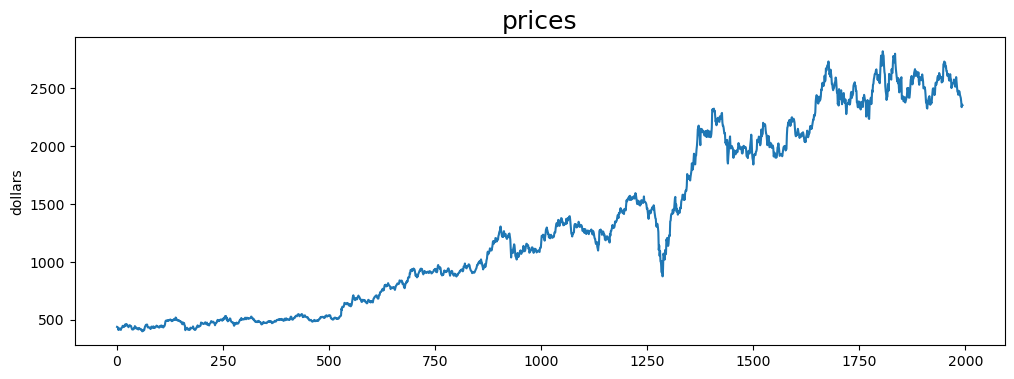

In [15]:
plt.figure(figsize=(12,4))
plt.plot(df['Close'])
plt.title('prices',fontsize=18)
plt.ylabel('dollars')
plt.show()

In [18]:
df.isnull().sum()

Date             0
Open             1
High             1
Low              1
Close            1
Adj Close        1
Volume           1
No. of Shares    0
No. of Trades    0
Change(%)        0
dtype: int64

In [19]:
df[2:25]

,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788,39864,-0.0110
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603546,8596809.0,975422,26226,-0.0454
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171295,9562421.0,660342,24450,0.0218
5,2015-01-08,426.011841,427.398682,416.130493,417.071564,396.404510,9171029.0,787134,20043,-0.0143
6,2015-01-09,420.216766,426.952911,418.532715,426.110901,404.995911,6180769.0,510671,16807,0.0217
7,2015-01-12,426.209961,426.457611,416.848694,421.157837,400.288269,4661200.0,503008,12635,-0.0116
8,2015-01-13,422.495178,423.460999,416.303864,417.616425,396.922363,4591328.0,426946,17722,-0.0084
9,2015-01-14,417.542114,419.523346,411.697510,413.554901,393.062103,5251887.0,669183,22637,-0.0097
10,2015-01-15,416.056213,431.460175,416.056213,428.067352,406.855377,7811847.0,574183,18515,0.0351
11,2015-01-16,425.962311,433.391876,422.024628,430.766754,409.421051,8831705.0,394114,20417,0.0063


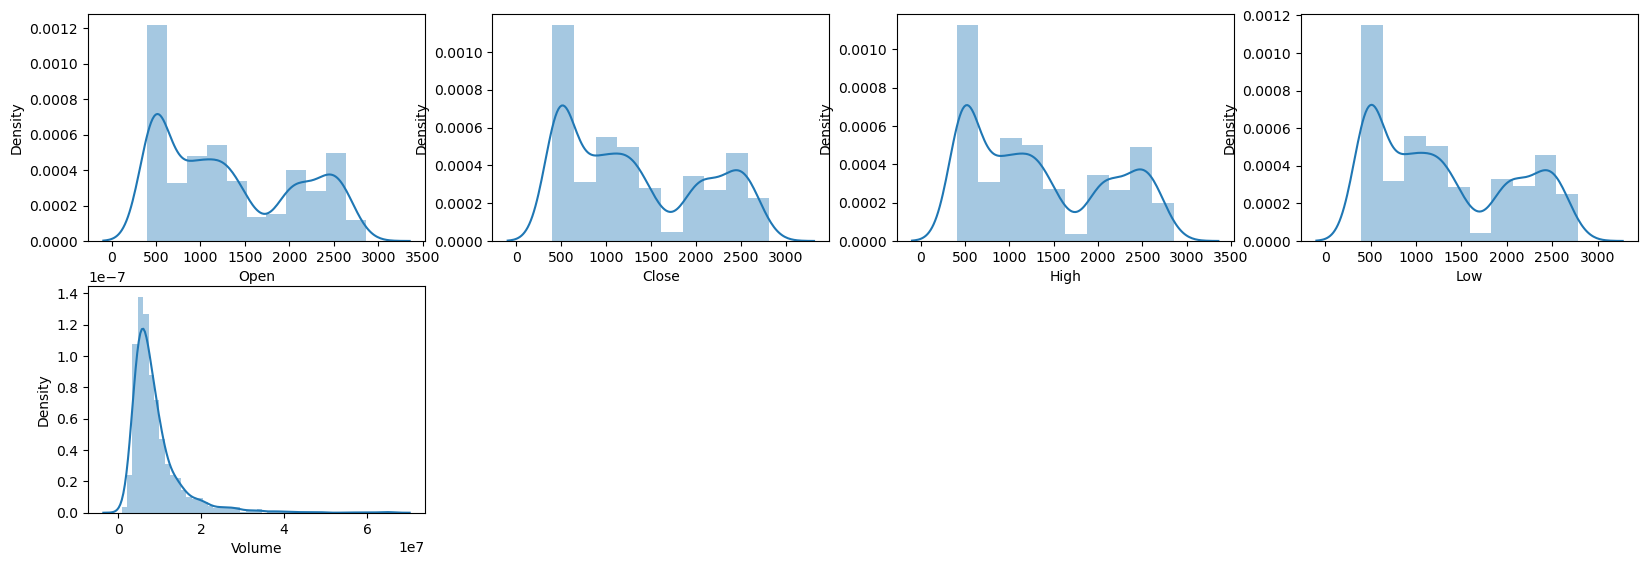

In [33]:
features=['Open','Close','High','Low','Volume','']
plt.subplots(figsize=(20,10))
for i , col in enumerate(features):
    plt.subplot(3,4,i+1)
    sb.distplot(df[col])
plt.show()

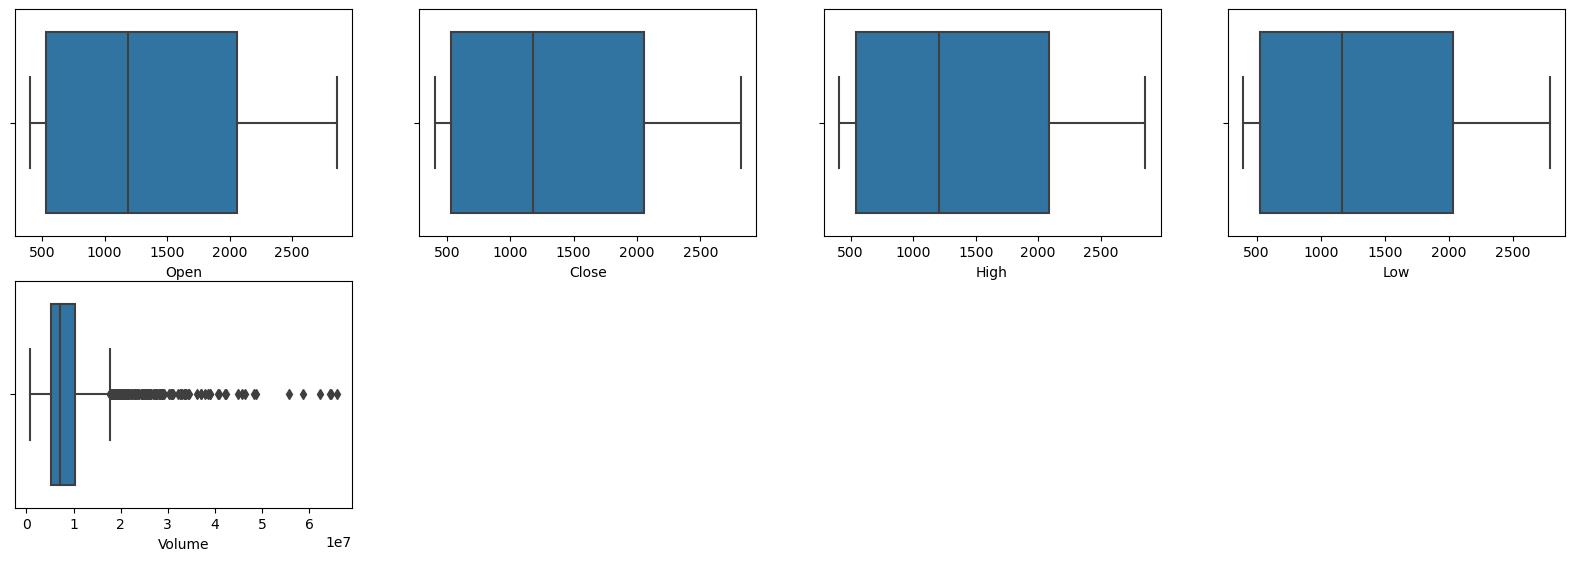

In [32]:
plt.subplots(figsize=(20,10))
for i , col in enumerate(features):
    plt.subplot(3,4,i+1)
    sb.boxplot(df[col])
plt.show()

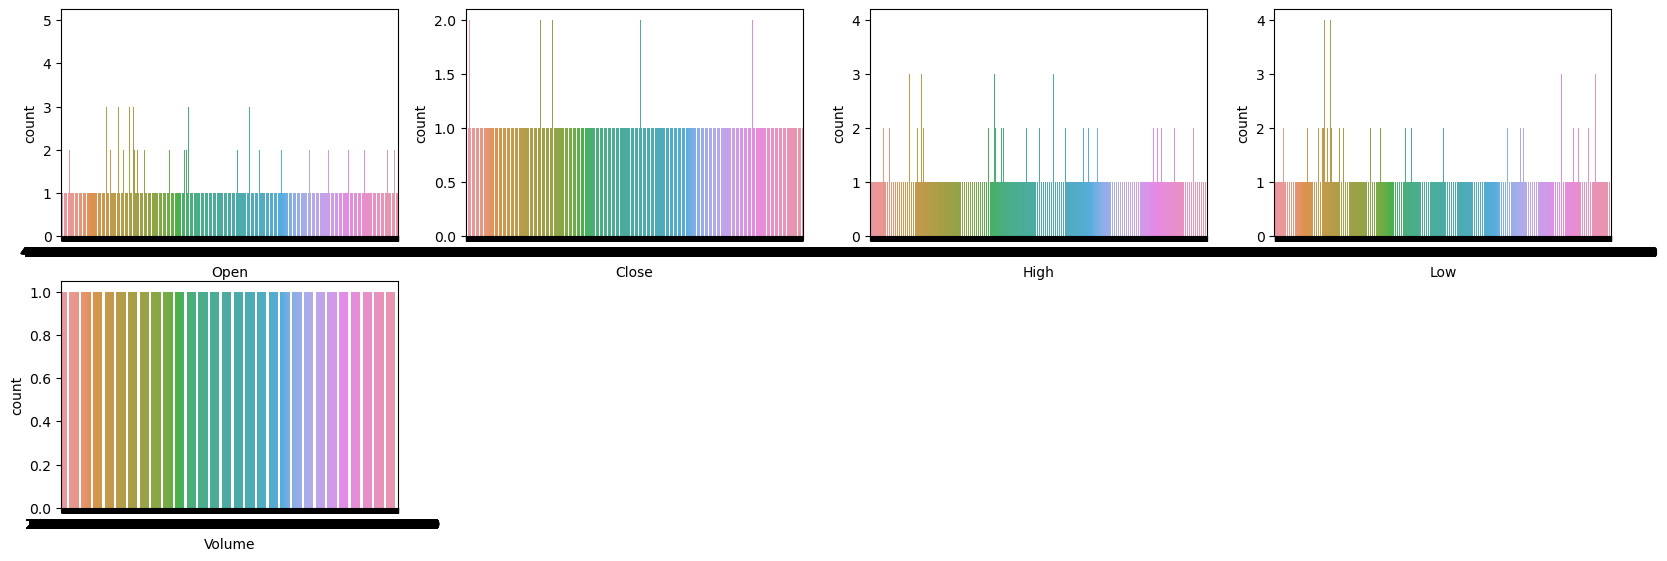

In [59]:
# Countplots
plt.subplots(figsize=(20,10))
for i , col in enumerate(features):
    plt.subplot(3,4,i+1)
    sb.countplot(df[col])
plt.show()

In [48]:
df['open-close']=df['Open']-df['Close']
df['low-high']=df['Low']-df['High']
df['target']=np.where(df['Close'].shift(-1) > df['Close'],1,0)

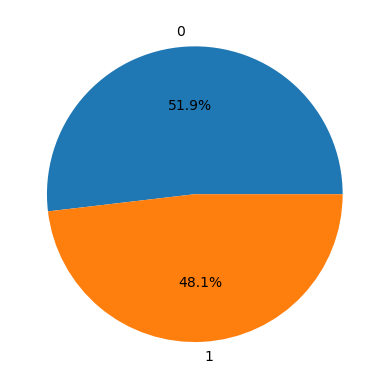

In [49]:
plt.pie(df['target'].value_counts().values,labels=[0,1],autopct='%1.1f%%')
plt.show()

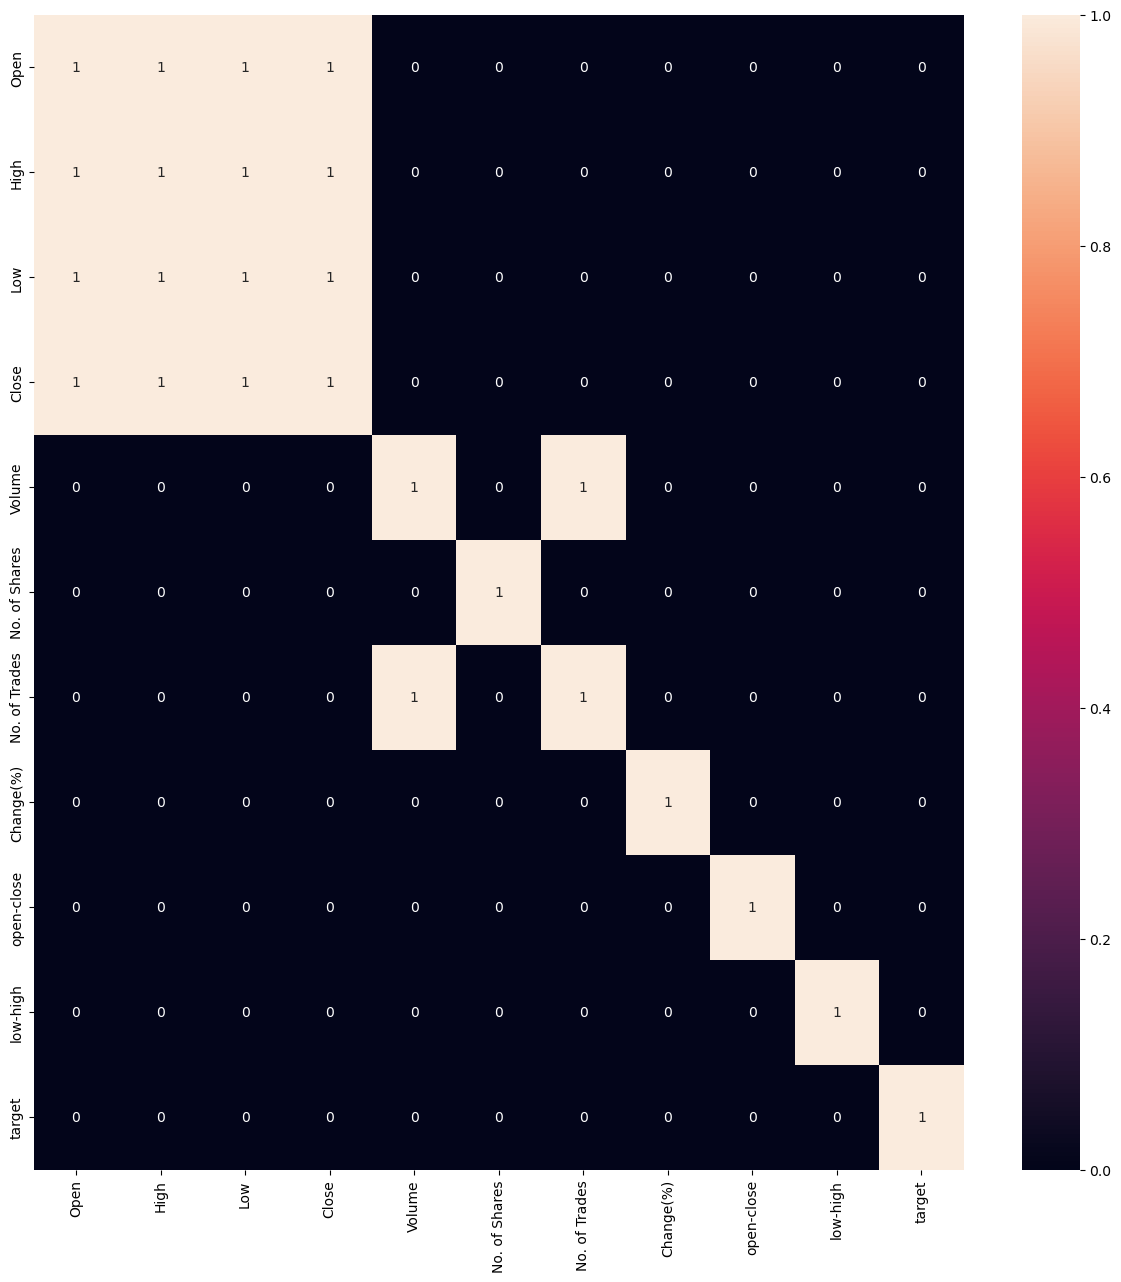

In [51]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr()>0.5,annot=True)
plt.show()

In [52]:
df1=df.iloc[:,1:]
df1

,Open,High,Low,Close,Volume,No. of Shares,No. of Trades,Change(%),open-close,low-high,target
0,438.988831,441.812073,437.676270,439.781311,1367720.0,181432,9740,-0.0036,-0.792480,-4.135803,0
1,439.880371,443.818054,437.998199,438.617340,3383424.0,260835,19270,-0.0026,1.263031,-5.819855,0
2,438.344940,441.267212,432.946106,433.812897,4662967.0,328788,39864,-0.0110,4.532043,-8.321106,0
3,430.915344,432.401276,412.093750,414.124512,8596809.0,975422,26226,-0.0454,16.790832,-20.307526,1
4,414.619812,425.367950,414.570282,423.139069,9562421.0,660342,24450,0.0218,-8.519257,-10.797668,0
...,...,...,...,...,...,...,...,...,...,...,...
1989,2440.000000,2443.649902,2387.350098,2415.949951,7609558.0,349349,15122,-0.0059,24.050049,-56.299804,0
1990,2412.449951,2414.699951,2380.000000,2382.550049,5715684.0,103914,14987,-0.0138,29.899902,-34.699951,0
1991,2384.399902,2387.350098,2311.649902,2337.350098,11920991.0,452582,59632,-0.0190,47.049804,-75.700196,1
1992,2331.699951,2371.899902,2301.000000,2359.750000,10047822.0,1392194,29192,0.0096,-28.050049,-70.899902,0


In [53]:
df=df1.copy()

In [54]:
df

,Open,High,Low,Close,Volume,No. of Shares,No. of Trades,Change(%),open-close,low-high,target
0,438.988831,441.812073,437.676270,439.781311,1367720.0,181432,9740,-0.0036,-0.792480,-4.135803,0
1,439.880371,443.818054,437.998199,438.617340,3383424.0,260835,19270,-0.0026,1.263031,-5.819855,0
2,438.344940,441.267212,432.946106,433.812897,4662967.0,328788,39864,-0.0110,4.532043,-8.321106,0
3,430.915344,432.401276,412.093750,414.124512,8596809.0,975422,26226,-0.0454,16.790832,-20.307526,1
4,414.619812,425.367950,414.570282,423.139069,9562421.0,660342,24450,0.0218,-8.519257,-10.797668,0
...,...,...,...,...,...,...,...,...,...,...,...
1989,2440.000000,2443.649902,2387.350098,2415.949951,7609558.0,349349,15122,-0.0059,24.050049,-56.299804,0
1990,2412.449951,2414.699951,2380.000000,2382.550049,5715684.0,103914,14987,-0.0138,29.899902,-34.699951,0
1991,2384.399902,2387.350098,2311.649902,2337.350098,11920991.0,452582,59632,-0.0190,47.049804,-75.700196,1
1992,2331.699951,2371.899902,2301.000000,2359.750000,10047822.0,1392194,29192,0.0096,-28.050049,-70.899902,0


In [57]:
df.corr()

<bound method DataFrame.corr of              Open         High          Low        Close      Volume  \
0      438.988831   441.812073   437.676270   439.781311   1367720.0   
1      439.880371   443.818054   437.998199   438.617340   3383424.0   
2      438.344940   441.267212   432.946106   433.812897   4662967.0   
3      430.915344   432.401276   412.093750   414.124512   8596809.0   
4      414.619812   425.367950   414.570282   423.139069   9562421.0   
...           ...          ...          ...          ...         ...   
1989  2440.000000  2443.649902  2387.350098  2415.949951   7609558.0   
1990  2412.449951  2414.699951  2380.000000  2382.550049   5715684.0   
1991  2384.399902  2387.350098  2311.649902  2337.350098  11920991.0   
1992  2331.699951  2371.899902  2301.000000  2359.750000  10047822.0   
1993  2382.000000  2387.650000  2341.000000  2353.850000  10470859.0   

      No. of Shares  No. of Trades  Change(%)  open-close   low-high  target  
0            181432     

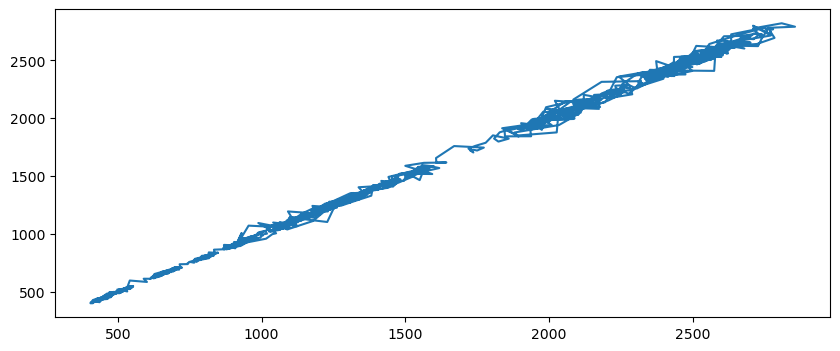

In [62]:
plt.figure(figsize=(10,4))
plt.plot(df['Open'],df['Close'])

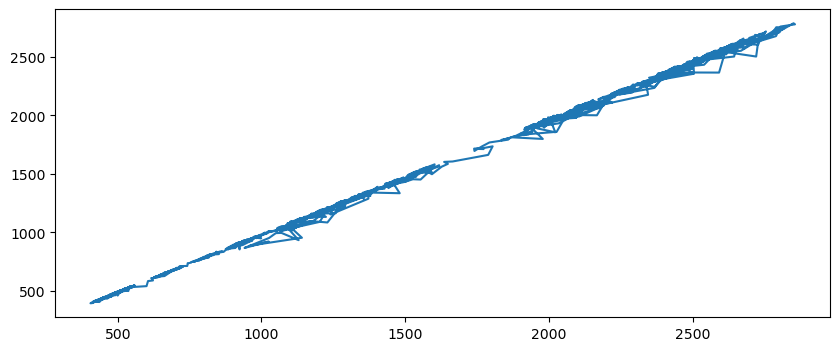

In [63]:
plt.figure(figsize=(10,4))
plt.plot(df['High'],df['Low'])

<AxesSubplot:ylabel='Frequency'>

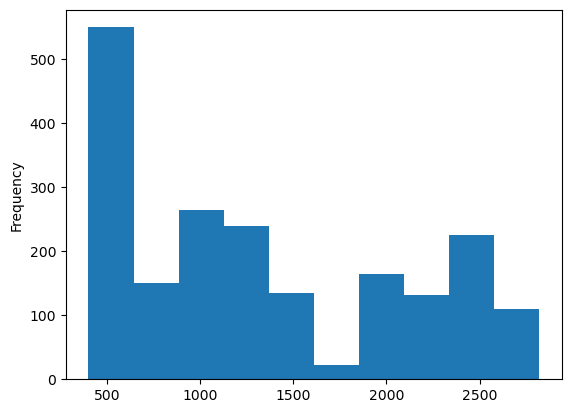

In [64]:
df['Close'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

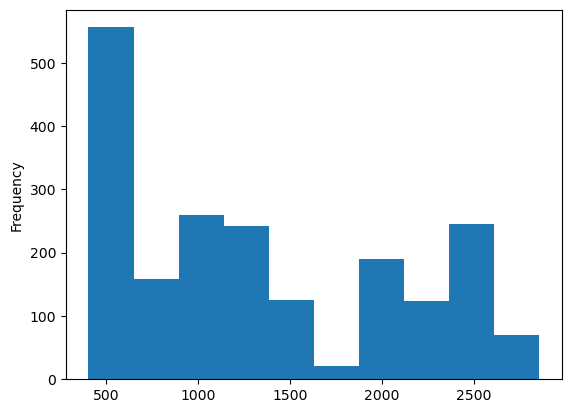

In [66]:
df['Open'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

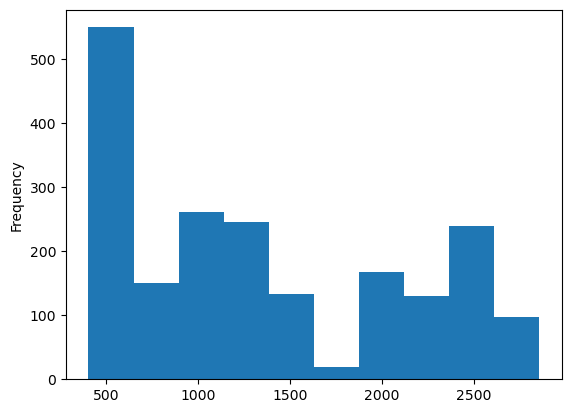

In [67]:
df['High'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

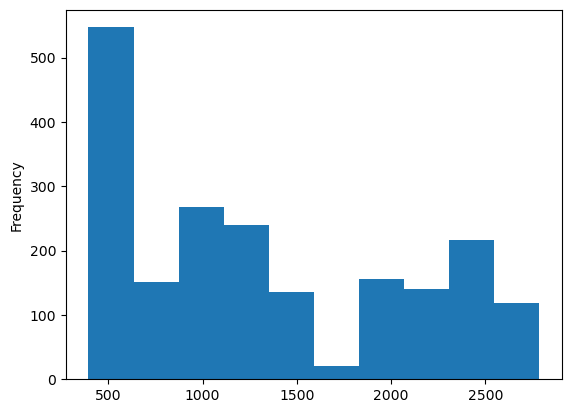

In [68]:
df['Low'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

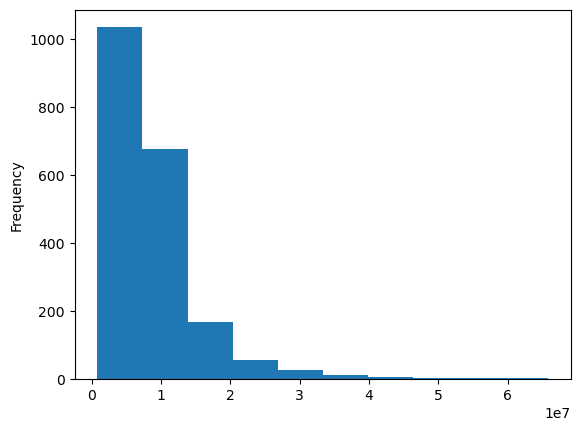

In [69]:
df['Volume'].plot(kind='hist')